In [287]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline
from sklearn.mixture import GaussianMixture
from sklearn import mixture
from scipy import stats
from sklearn.cluster import KMeans

In [288]:
from sklearn.datasets import load_iris

In [289]:
iris_data = load_iris()
type(iris_data)

sklearn.utils.Bunch

In [290]:
print (iris_data.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [291]:
print (iris_data.data.shape)

(150, 4)


In [292]:
print (iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [293]:
print (iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [294]:
print (iris_data.target_names)

['setosa' 'versicolor' 'virginica']


In [295]:
print (iris_data.target.shape)

(150,)


In [296]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [297]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [298]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [299]:
gmm = mixture.GaussianMixture(n_components=4)
gmm_iris=gmm.fit(iris_df)

# predict the cluster for each data point
y_gmm = gmm_iris.predict(iris_df)
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

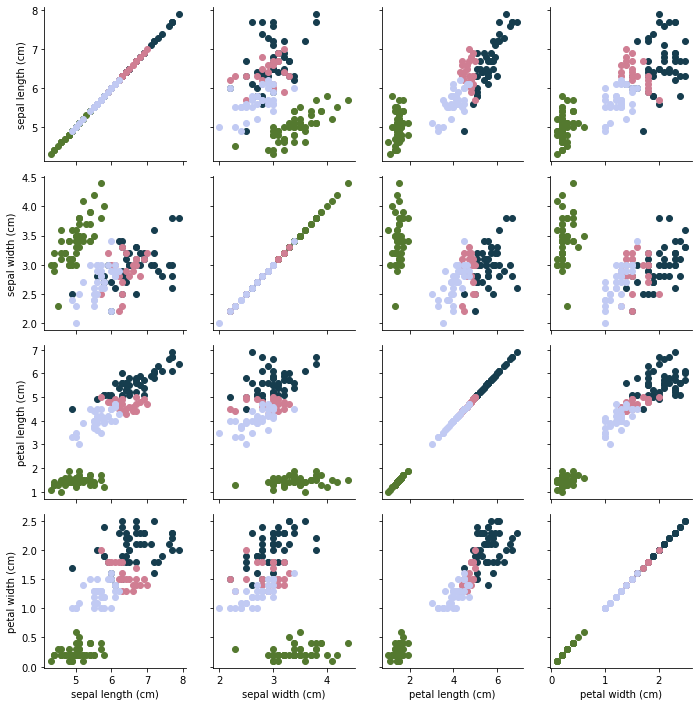

In [300]:
iris_df['gmm_pred']=y_gmm
g = sns.PairGrid(iris_df, hue="gmm_pred", palette=sns.color_palette("cubehelix", 4) )
g.map(plt.scatter)
plt.show()

In [327]:
iris_df_data = pd.DataFrame(iris_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
iris_df_tag = pd.DataFrame(iris_data.target, columns=["class"])

iris_df_tag = np.array(iris_df_tag).reshape(150,)
np.sum(y_gmm==df_tag) / len(y_gmm)

0.03333333333333333

In [301]:
iris_df['labels']= y_gmm
d0 = iris_df[iris_df['labels']==0]
d1 = iris_df[iris_df['labels']==1]
d2 = iris_df[iris_df['labels']==2]


In [302]:
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]]
)

In [303]:
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [304]:
import sklearn
from sklearn.datasets import make_blobs
X_blob,y_blob = sklearn.datasets.make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std)

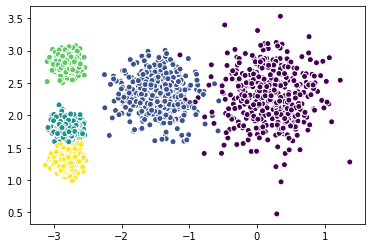

In [305]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, edgecolor='w')
plt.show()

In [306]:
iris_df['target']=pd.Series(iris_data.target)
iris_df['target_names']=pd.Series(iris_data.target_names)
species=[]
for i in range(len(iris_df)):
  if iris_df.iloc[i]['target']==0:
    species.append('setosa')
  elif iris_df.iloc[i]['target']==1:
    species.append('versicolor')
  elif iris_df.iloc[i]['target']==2:
    species.append('virginica')
  

In [307]:
iris_df['species'] = species

In [308]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),gmm_pred,labels,target,target_names,species
0,5.1,3.5,1.4,0.2,1,1,0,setosa,setosa
1,4.9,3.0,1.4,0.2,1,1,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,1,1,0,virginica,setosa
3,4.6,3.1,1.5,0.2,1,1,0,NaN,setosa
4,5.0,3.6,1.4,0.2,1,1,0,NaN,setosa
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,2,NaN,virginica
146,6.3,2.5,5.0,1.9,0,0,2,NaN,virginica
147,6.5,3.0,5.2,2.0,0,0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,0,0,2,NaN,virginica


In [309]:
x=iris_data
x

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

Text(0, 0.5, 'Sepal length')

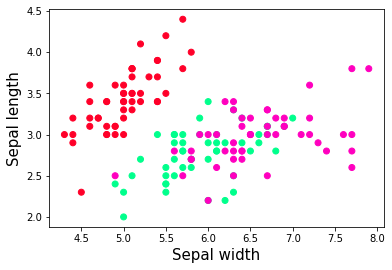

In [310]:
plt.scatter(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], c=iris_data.target, cmap='gist_rainbow')
plt.xlabel('Sepal width', fontsize=15)
plt.ylabel('Sepal length', fontsize=15)

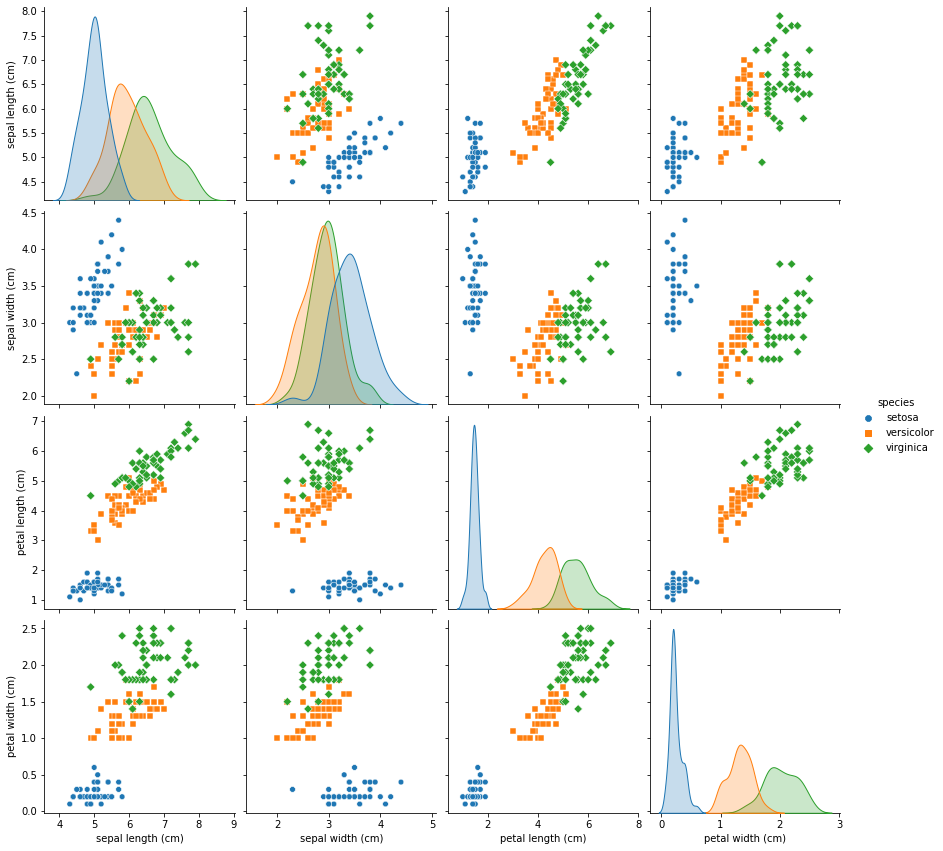

In [311]:
sns.pairplot(iris_df.drop(['target','gmm_pred','labels'],axis=1), hue='species', height=3, markers=["8","s","D"])

In [312]:
kmeans= KMeans(n_clusters=6, init= 'k-means++', random_state=0)
y=kmeans.fit_predict(x.data)
print(y)

[5 1 1 1 5 5 1 5 1 1 5 1 1 1 5 5 5 5 5 5 5 5 1 5 1 1 5 5 5 1 1 5 5 5 1 1 5
 5 1 5 5 1 1 5 5 1 5 1 5 1 2 2 2 3 2 2 2 3 2 3 3 2 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 4 0 0 4 3 4 0 4 0
 0 0 2 0 0 0 4 4 2 0 2 4 2 0 4 2 2 0 4 4 4 0 2 2 4 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [313]:
kmeans.cluster_centers_

array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.24285714, 3.66785714, 1.5       , 0.28214286]])

In [314]:
pd.crosstab(iris_data.target,kmeans.labels_)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,0,22,0,0,0,28
1,0,0,26,24,0,0
2,24,0,13,1,12,0


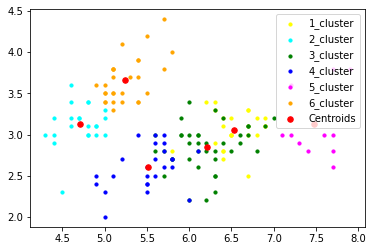

In [315]:
plt.scatter(x.data[y==0,0], x.data[y==0,1], s = 10, c='yellow', label ='1_cluster')
plt.scatter(x.data[y==1,0], x.data[y==1,1], s = 10, c='cyan', label = '2_cluster')
plt.scatter(x.data[y==2,0], x.data[y==2,1], s = 10, c='green', label = '3_cluster')
plt.scatter(x.data[y==3,0], x.data[y==3,1], s = 10, c='blue', label = '4_cluster')
plt.scatter(x.data[y==4,0], x.data[y==4,1], s = 10, c='magenta', label = '5_cluster')
plt.scatter(x.data[y==5,0], x.data[y==5,1], s = 10, c='orange', label = '6_cluster')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =30, c='red' , label = 'Centroids')
plt.legend()
plt.show()

In [316]:
kmeans.labels_

array([5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 4, 0, 0, 4, 3, 4, 0, 4,
       0, 0, 0, 2, 0, 0, 0, 4, 4, 2, 0, 2, 4, 2, 0, 4, 2, 2, 0, 4, 4, 4,
       0, 2, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [317]:
Err=[]
for i in range (1,10):
  kmeans10=KMeans(n_clusters=i, init='k-means++' , max_iter=9, random_state=0).fit(x.data)
  kmeans10.fit(x.data)
  Err.append(kmeans10.inertia_)



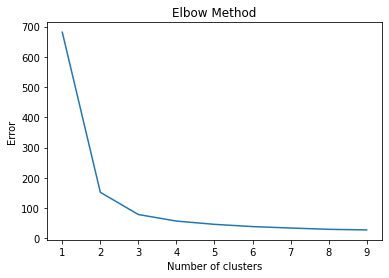

In [318]:
plt.plot(range(1,10), Err)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

***Therefore K value at elbow is 3.***

In [319]:
kmeans3= KMeans(n_clusters=3, init= 'k-means++', random_state=0)
kmeans3.fit(x.data)
y_3=kmeans3.predict(x.data)
kmeans8= KMeans(n_clusters=8, init= 'k-means++', random_state=0)
kmeans8.fit(x.data)
y_8=kmeans8.predict(x.data)


In [320]:
kmeans3.inertia_

78.85144142614601

In [321]:
kmeans8.inertia_

30.014398496240602

***As the number of clusters ie K increase from 3 the inertia falls down gradually.***

In [322]:
center=kmeans8.cluster_centers_

center

array([[4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [6.03684211, 2.70526316, 5.        , 1.77894737],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.2       , 2.36666667, 3.38333333, 1.01666667],
       [5.62272727, 2.70909091, 4.11818182, 1.28636364],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [6.44210526, 2.97894737, 4.59473684, 1.43157895]])

In [323]:
X_new=np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

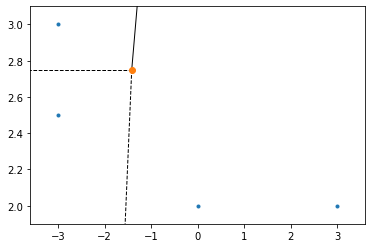

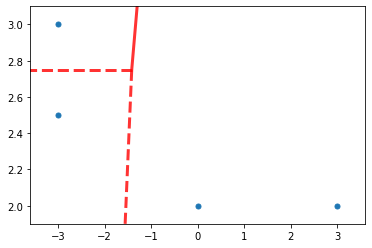

In [328]:
points=X_new
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points) 
fig1 = voronoi_plot_2d(vor) 
fig2 = voronoi_plot_2d(vor, show_vertices=False, line_colors='red',
                       line_width=3, line_alpha=0.8, point_size=10)